<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_PCA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://www.jcchouinard.com/pca-with-python
- https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/

In [41]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=names)
# print(dataset.describe())
dataset_attr = dataset[['sepal-length','sepal-width','petal-length','petal-width']]
class_num = []
for c in dataset['class']:
  if (c == 'Iris-setosa'):
    class_num.append(["0"])
  elif (c == 'Iris-versicolor'):
    class_num.append(["1"])
  else:
    class_num.append(["2"])
# print(dataset_attr.describe())
print(class_num)

[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['1'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2'], ['2']

In [4]:
# Scaling the data
data_attr_scaled1 = StandardScaler().fit_transform(dataset_attr)
data_attr_scaled = pd.DataFrame(data_attr_scaled1, columns=['sepal-length','sepal-width','petal-length','petal-width'])
data_attr_scaled.head(5)

,sepal-length,sepal-width,petal-length,petal-width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


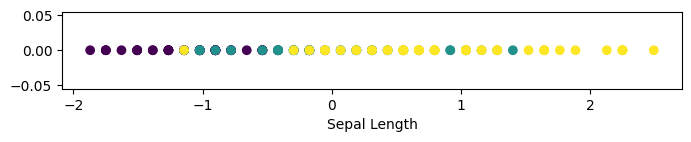

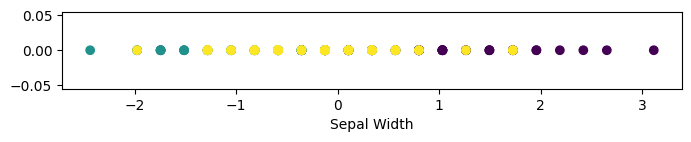

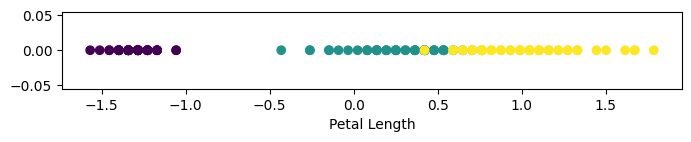

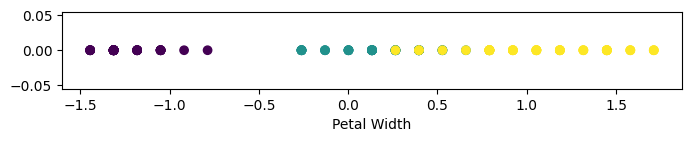

In [5]:
# Plotting a variable
# Sepal Length
plt.figure(figsize=(8,1))
plt.scatter(data_attr_scaled['sepal-length'], [0]*dataset.shape[0], c=class_num)
plt.xlabel('Sepal Length')
plt.show()

# Sepal Width
plt.figure(figsize=(8,1))
plt.scatter(data_attr_scaled['sepal-width'], [0]*dataset.shape[0], c=class_num)
plt.xlabel('Sepal Width')
plt.show()

# Petal Length
plt.figure(figsize=(8,1))
plt.scatter(data_attr_scaled['petal-length'], [0]*dataset.shape[0], c=class_num)
plt.xlabel('Petal Length')
plt.show()

# Petal Width
plt.figure(figsize=(8,1))
plt.scatter(data_attr_scaled['petal-width'], [0]*dataset.shape[0], c=class_num)
plt.xlabel('Petal Width')
plt.show()

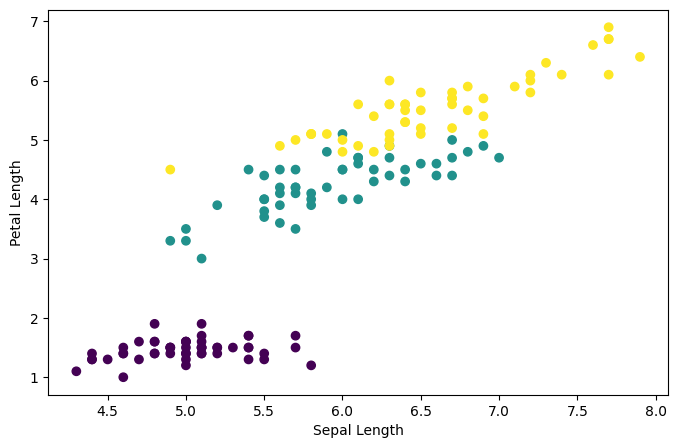

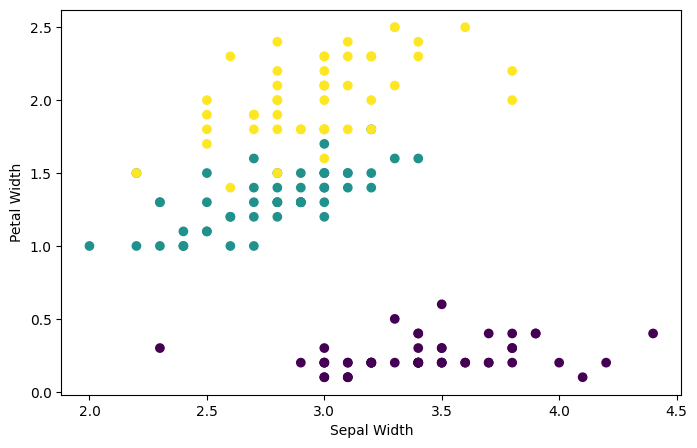

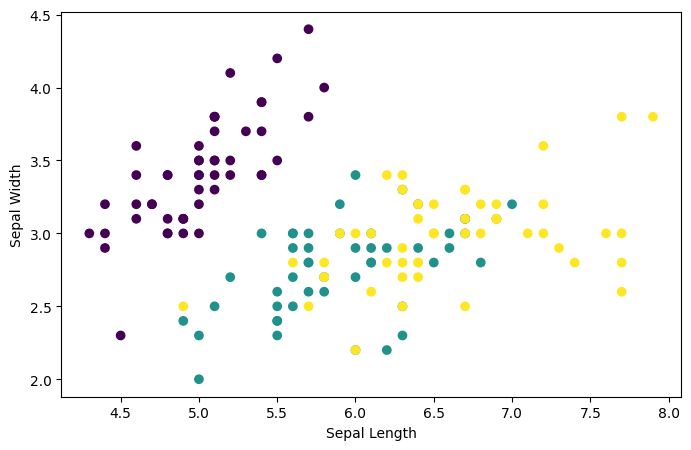

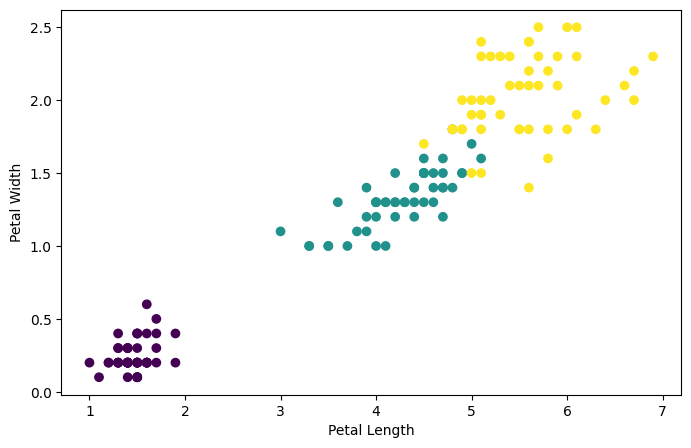

In [6]:
# Plotting 2 variables
# Sepal Length vs Petal Length
plt.figure(figsize=(8,5))
plt.scatter(dataset['sepal-length'], dataset['petal-length'], c=class_num)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

# Sepal Width vs Petal Width
plt.figure(figsize=(8,5))
plt.scatter(dataset['sepal-width'], dataset['petal-width'], c=class_num)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

# Sepal Length vs Sepal Width
plt.figure(figsize=(8,5))
plt.scatter(dataset['sepal-length'], dataset['sepal-width'], c=class_num)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Petal Length vs Petal Width
plt.figure(figsize=(8,5))
plt.scatter(dataset['petal-length'], dataset['petal-width'], c=class_num)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
[0.72770452 0.23030523]


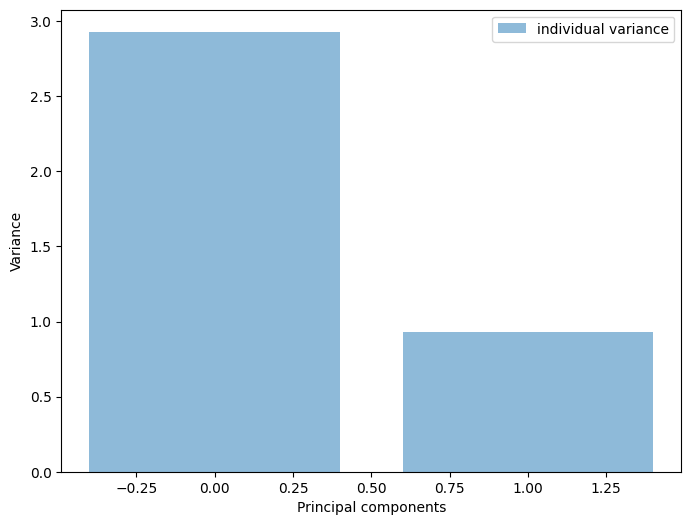

In [119]:
# Do the PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_attr_scaled)
pca_variance = pca.explained_variance_
# pca_data_attr = pd.DataFrame(pca_features, columns=['PC1','PC2','PC3','PC4'])
pca_data_attr = pd.DataFrame(pca_features, columns=['PC1','PC2'])
print(pca.components_)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
# plt.bar(range(4), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.bar(range(2), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance')
plt.xlabel('Principal components')
plt.show()

        PC1       PC2        class
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


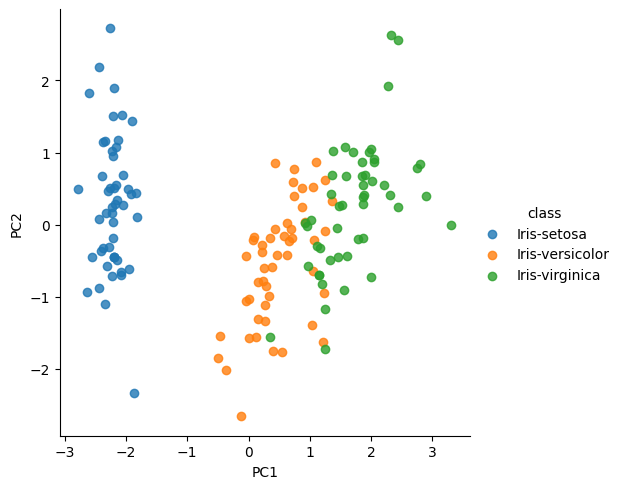

In [120]:
# Plotting the data after PCA
pca_data_attr['class'] = dataset['class']
print(pca_data_attr.head(5))

sns.lmplot(x='PC1', y='PC2', data=pca_data_attr, hue='class', fit_reg=False, legend=True)
plt.show()

In [70]:
# Importing other libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [104]:
# Splitting the data
# Original data
X_train, X_test, y_train, y_test = train_test_split(dataset_attr, dataset['class'], random_state = 0)

# Standardized data
XStd_train, XStd_test, yStd_train, yStd_test = train_test_split(data_attr_scaled, dataset['class'], random_state = 0)

# PCA data
XPCA_train, XPCA_test, yPCA_train, yPCA_test = train_test_split(pca_data_attr[['PC1','PC2']], dataset['class'], random_state = 0)

In [105]:
DTOri = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
DTStd = DecisionTreeClassifier(max_depth=2).fit(XStd_train, yStd_train)
DTPCA = DecisionTreeClassifier(max_depth=2).fit(XPCA_train, yPCA_train)

textrep_ori = tree.export_text(DTOri)
print(textrep_ori)

textrep_std = tree.export_text(DTStd)
print(textrep_std)

textrep_pca = tree.export_text(DTPCA)
print(textrep_pca)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- class: Iris-virginica

|--- feature_3 <= -0.52
|   |--- class: Iris-setosa
|--- feature_3 >  -0.52
|   |--- feature_2 <= 0.68
|   |   |--- class: Iris-versicolor
|   |--- feature_2 >  0.68
|   |   |--- class: Iris-virginica

|--- feature_0 <= -1.16
|   |--- class: Iris-setosa
|--- feature_0 >  -1.16
|   |--- feature_0 <= 1.25
|   |   |--- class: Iris-versicolor
|   |--- feature_0 >  1.25
|   |   |--- class: Iris-virginica



In [92]:
# Do the prediction using original data
DTOriPredict = DTOri.predict(X_test)

# Count the accuracy
acc_ori = DTOri.score(X_test, y_test)
print(acc_ori)

# Show the confusion matrix
cm_ori = confusion_matrix(y_test, DTOriPredict)
print(cm_ori)

print(classification_report(y_test, DTOriPredict))

0.8947368421052632
[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



In [106]:
# Do the prediction using standardized original data
DTStdPredict = DTStd.predict(XStd_test)

# Count the accuracy
acc_std = DTStd.score(XStd_test, yStd_test)
print(acc_std)

# Show the confusion matrix
cm_std = confusion_matrix(yStd_test, DTStdPredict)
print(cm_std)

print(classification_report(yStd_test, DTStdPredict))

0.8947368421052632
[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



In [107]:
# Do the prediction using PCA data
DTPCAPredict = DTPCA.predict(XPCA_test)

# Count the accuracy
acc_PCA = DTPCA.score(XPCA_test, yPCA_test)
print(acc_PCA)

# Show the confusion matrix
cm_PCA = confusion_matrix(yPCA_test, DTPCAPredict)
print(cm_PCA)

print(classification_report(yPCA_test, DTPCAPredict))

0.868421052631579
[[13  0  0]
 [ 0 15  1]
 [ 0  4  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.79      0.94      0.86        16
 Iris-virginica       0.83      0.56      0.67         9

       accuracy                           0.87        38
      macro avg       0.87      0.83      0.84        38
   weighted avg       0.87      0.87      0.86        38

